## Task 1
# Exploratory Data Analysis

Segmenting the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.

### Importing Libraries

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

### Loading the Dataset

In [67]:
customer_df=pd.read_csv('ANZ.csv')
customer_df.head()  #showing first 5 rows of dataframe

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [68]:
customer_df.info()  #information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [69]:
customer_df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### Data Cleaning

Dropping-off the rows which has no value.

In [70]:
df = customer_df[pd.notnull(customer_df['customer_id'])]
df

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit


In [71]:
df= customer_df[['customer_id','amount','date']]
df.head(40)

,customer_id,amount,date
0,CUS-2487424745,16.25,8/1/2018
1,CUS-2487424745,14.19,8/1/2018
2,CUS-2142601169,6.42,8/1/2018
3,CUS-1614226872,40.90,8/1/2018
4,CUS-2487424745,3.25,8/1/2018
5,CUS-2688605418,163.00,8/1/2018
6,CUS-4123612273,61.06,8/1/2018
7,CUS-4123612273,15.61,8/1/2018
8,CUS-3026014945,19.25,8/1/2018
9,CUS-2031327464,21.00,8/1/2018



### Number of transaction made by customers in total

In [72]:
df_c=df['customer_id'].value_counts() #counting the number of transaction made by each customer_id
df_c1 = pd.DataFrame(data=df_c.values, index = df_c.index, columns=['Count'])
df_c1.head(20)

,Count
CUS-2487424745,578
CUS-2142601169,303
CUS-3026014945,292
CUS-3378712515,260
CUS-1614226872,259
CUS-1196156254,245
CUS-2695611575,239
CUS-51506836,239
CUS-860700529,233
CUS-1669695324,230


### Average Transaction made by customers each month

In [73]:
df_average = df_c1['Count']/3 #average transaction made each month by each customer_id in descending order
df_average = pd.DataFrame(data = df_average.values, index = df_average.index, columns= ['Average transaction made each month by each customer'])
df_average.head()  #printing top 5 customer_id with highest number of transaction

,Average transaction made each month by each customer
CUS-2487424745,192.666667
CUS-2142601169,101.000000
CUS-3026014945,97.333333
CUS-3378712515,86.666667
CUS-1614226872,86.333333


In [74]:
df.head(50)

,customer_id,amount,date
0,CUS-2487424745,16.25,8/1/2018
1,CUS-2487424745,14.19,8/1/2018
2,CUS-2142601169,6.42,8/1/2018
3,CUS-1614226872,40.90,8/1/2018
4,CUS-2487424745,3.25,8/1/2018
5,CUS-2688605418,163.00,8/1/2018
6,CUS-4123612273,61.06,8/1/2018
7,CUS-4123612273,15.61,8/1/2018
8,CUS-3026014945,19.25,8/1/2018
9,CUS-2031327464,21.00,8/1/2018



### Average Transaction Amount each month

In [75]:
df_a=df['amount'].sum()/3 #average transaction volume per month
print('The average transaction amount per month by all customers is AUD',df_a)

The average transaction amount per month by all customers is AUD 754428.0666666668


## Average Transaction Amount by each customer

In [76]:
avgt=df['amount'].sum()/100
print('The average transaction amount per customers is AUD',avgt)

The average transaction amount per customers is AUD 22632.842


In [77]:
amount = df.groupby("customer_id").sum()
amount

,amount
customer_id,
CUS-1005756958,16268.97
CUS-1117979751,33984.37
CUS-1140341822,17010.60
CUS-1147642491,28980.82
CUS-1196156254,36050.72
...,...
CUS-72755508,11438.37
CUS-809013380,18810.09
CUS-860700529,18099.88


In [96]:
Date = df.groupby(['date'], as_index = False).agg('sum')
Date['date'] = pd.to_datetime(Date.date)
Date

,date,amount
0,2018-10-01,40823.03
1,2018-10-10,29399.50
2,2018-10-11,20851.67
3,2018-10-12,40658.20
4,2018-10-13,10140.81
...,...,...
86,2018-09-05,24775.07
87,2018-09-06,35799.17
88,2018-09-07,38365.27
89,2018-09-08,7707.51


In [97]:

Datev = Date.sort_values(by ='date')
Datev.reset_index(inplace=True, drop = True)
Datev.head(21)

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50
5,2018-08-06,42288.23
6,2018-08-07,35623.04
7,2018-08-08,22553.11
8,2018-08-09,28866.80
9,2018-08-10,30754.36


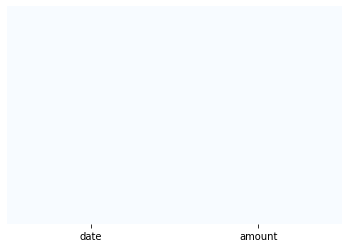

In [98]:
sns.heatmap(Date.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')


In [111]:
Week1 = Datev.iloc[0:7].sum()
Week2 = Datev.iloc[8:14].sum()
Week3 = Datev.iloc[15:21].sum()
Week4 = Datev.iloc[22:28].sum()
Week5 = Datev.iloc[29:35].sum()
Week6 = Datev.iloc[36:42].sum()
Week7 = Datev.iloc[43:49].sum()
Week8 = Datev.iloc[50:56].sum()
Week9 = Datev.iloc[57:63].sum()
Week10 = Datev.iloc[64:70].sum()
Week11 = Datev.iloc[71:77].sum()
Week12 = Datev.iloc[78:84].sum()
Week13 = Datev.iloc[85:91].sum()
print(Week1, Week2, Week3, Week4, Week5, Week6, Week7, Week8, Week9, Week10, Week11, Week12, Week13)

amount    178384.66
dtype: float64 amount    124061.34
dtype: float64 amount    150235.83
dtype: float64 amount    127858.95
dtype: float64 amount    140448.23
dtype: float64 amount    143783.84
dtype: float64 amount    161963.73
dtype: float64 amount    148941.5
dtype: float64 amount    144559.52
dtype: float64 amount    134672.07
dtype: float64 amount    157493.57
dtype: float64 amount    168163.41
dtype: float64 amount    144439.35
dtype: float64


In [116]:
volume = [['week1',178384.66] , ['week2',124061.34], ['week3',150235.83],['week4',127858.95],['week5',140448.23], ['week6',143783.84], ['week7',161963.73], ['week8',148941.5], ['week9', 144559.52],['week10',134672.07], ['week11',157493.57], ['week12',168163.41], ['week13',144439.35]]
volumedata = pd.DataFrame(volume, columns = ['Week','Volume'])
volumedata

,Week,Volume
0,week1,178384.66
1,week2,124061.34
2,week3,150235.83
3,week4,127858.95
4,week5,140448.23
5,week6,143783.84
6,week7,161963.73
7,week8,148941.50
8,week9,144559.52
9,week10,134672.07


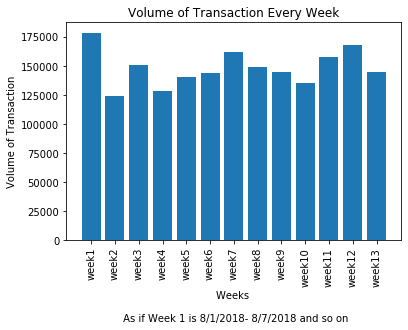

In [126]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(volumedata.Volume))
    plt.bar(volumedata.Week, volumedata.Volume)
    plt.xlabel('Weeks \n\n As if Week 1 is 8/1/2018- 8/7/2018 and so on')
    plt.ylabel('Volume of Transaction')
    plt.xticks(volumedata.Week, rotation = 90)
    plt.title('Volume of Transaction Every Week')
    plt.show()
plot_bar_x()
